In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.linear_model import Lasso, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import math


#this will mute errors that make your final pdf less legible
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train= df = pd.read_csv('/content/drive/My Drive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')


season_mapping = {'Winter': 1.0, 'Spring': 0.0}
df_train['season'] = df_train['season'].map(season_mapping)
df_test['season'] = df_test['season'].map(season_mapping)

print(df_train.shape, df_test.shape)

(13814, 33) (2961, 33)


In [4]:
df.columns

Index(['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'season', 'RH_out_log', 'Appliances_sq',
       'RH_out_sq', 'Appliances_log'],
      dtype='object')

In [5]:
predictors = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'season']
X_train = df_train[predictors]
X_test = df_test[predictors]
y_train = df_train['Appliances_log']
y_test = df_test['Appliances_log']

In [6]:
# Scale the Values
scaler = StandardScaler()
scaler.fit(X_train)

X_std_train = scaler.transform(X_train)
X_std_test = scaler.transform(X_test)

In [7]:
# Initialize and fit LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_std_train, y_train)

LassoCV(cv=5)

In [8]:
# Extract and print the best lambda for LassoCV
best_lambda_lasso = lasso.alpha_
print(f"Best lambda for LassoCV: {best_lambda_lasso}")


Best lambda for LassoCV: 0.00016868585880385663


In [9]:
# Predictions for LassoCV
y_pred_lasso = lasso.predict(X_std_train)
y_test_pred_lasso = lasso.predict(X_std_test)


In [10]:
# Evaluate LassoCV
lasso_train_mse = mean_squared_error(y_train, y_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)
lasso_r2_train = r2_score(y_train, y_pred_lasso)
lasso_r2_test = r2_score(y_test, y_test_pred_lasso)

print("LassoCV Results:")
print("Train MSE:", lasso_train_mse)
print("Test MSE:", lasso_test_mse)
print("Train R^2:", lasso_r2_train)
print("Test R^2:", lasso_r2_test)
print("Best alpha for LassoCV:", lasso.alpha_)
best_lambda_lasso = lasso.alpha_
print(f"Best lambda for LassoCV: {best_lambda_lasso}")



LassoCV Results:
Train MSE: 0.3051320390880696
Test MSE: 0.33028541908560116
Train R^2: 0.27092152413272785
Test R^2: 0.27149557512887346
Best alpha for LassoCV: 0.00016868585880385663
Best lambda for LassoCV: 0.00016868585880385663


In [11]:
# Initialize and fit RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(X_std_train, y_train)

RidgeCV(cv=5)

In [12]:
# Predictions for RidgeCV
y_pred_ridge = ridge.predict(X_std_train)
y_test_pred_ridge = ridge.predict(X_std_test)

In [13]:
# Evaluate RidgeCV
ridge_train_mse = mean_squared_error(y_train, y_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_r2_train = r2_score(y_train, y_pred_ridge)
ridge_r2_test = r2_score(y_test, y_test_pred_ridge)

print("\nRidgeCV Results:")
print("Train MSE:", ridge_train_mse)
print("Test MSE:", ridge_test_mse)
print("Train R^2:", ridge_r2_train)
print("Test R^2:", ridge_r2_test)
print("Best alpha for RidgeCV:", ridge.alpha_)






RidgeCV Results:
Train MSE: 0.30509103397022436
Test MSE: 0.33013704038664704
Train R^2: 0.2710195012213046
Test R^2: 0.2718228512739844
Best alpha for RidgeCV: 1.0


In [14]:
# Define a range of alphas (lambda values)
alphas = np.logspace(-4, 2, 100)

# Initialize lists to store MSE values
lasso_train_mse1 = []
lasso_test_mse1 = []
ridge_train_mse1 = []
ridge_test_mse1 = []

# Initialize lists to store coefficients
lasso_coeffs = []
ridge_coeffs = []



In [15]:
# Compute MSE for each alpha
for alpha in alphas:
    # Lasso model
    lasso = LassoCV(alphas=[alpha], cv=5).fit(X_std_train, y_train)
    y_pred_lasso_train = lasso.predict(X_std_train)
    y_pred_lasso_test = lasso.predict(X_std_test)
    lasso_train_mse1.append(mean_squared_error(y_train, y_pred_lasso_train))
    lasso_test_mse1.append(mean_squared_error(y_test, y_pred_lasso_test))
    lasso_coeffs.append(lasso.coef_)

    # Ridge model
    ridge = RidgeCV(alphas=[alpha], cv=5).fit(X_std_train, y_train)
    y_pred_ridge_train = ridge.predict(X_std_train)
    y_pred_ridge_test = ridge.predict(X_std_test)
    ridge_train_mse1.append(mean_squared_error(y_train, y_pred_ridge_train))
    ridge_test_mse1.append(mean_squared_error(y_test, y_pred_ridge_test))
    ridge_coeffs.append(ridge.coef_)

# Find optimal alphas and minimum test MSE for both models
lasso_opt_alpha = alphas[np.argmin(lasso_test_mse1)]
ridge_opt_alpha = alphas[np.argmin(ridge_test_mse1)]
lasso_min_test_mse = min(lasso_test_mse1)
ridge_min_test_mse = min(ridge_test_mse1)

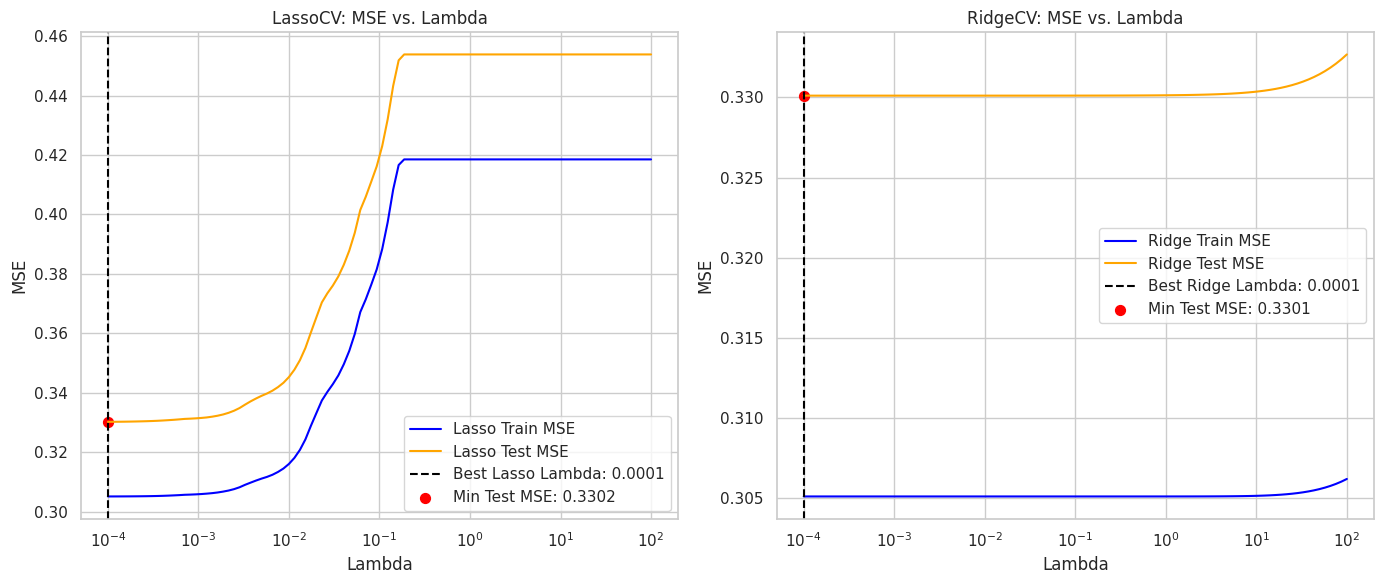

In [16]:
# Plotting Lasso MSE
plt.figure(figsize=(14, 6))

# Plot for Lasso MSE
plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_train_mse1, label='Lasso Train MSE', color='blue')
plt.plot(alphas, lasso_test_mse1, label='Lasso Test MSE', color='orange')
plt.axvline(lasso_opt_alpha, color='black', linestyle='--', label=f'Best Lasso Lambda: {lasso_opt_alpha:.4f}')
plt.scatter(lasso_opt_alpha, lasso_min_test_mse, color='red', s=50, label=f'Min Test MSE: {lasso_min_test_mse:.4f}')
plt.xscale('log')  # log scale for lambda
plt.xlabel("Lambda", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title('LassoCV: MSE vs. Lambda')
plt.legend()
plt.grid(True)

# Plot for Ridge MSE
plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_train_mse1, label='Ridge Train MSE', color='blue')
plt.plot(alphas, ridge_test_mse1, label='Ridge Test MSE', color='orange')
plt.axvline(ridge_opt_alpha, color='black', linestyle='--', label=f'Best Ridge Lambda: {ridge_opt_alpha:.4f}')
plt.scatter(ridge_opt_alpha, ridge_min_test_mse, color='red', s=50, label=f'Min Test MSE: {ridge_min_test_mse:.4f}')
plt.xscale('log')  # log scale for lambda
plt.xlabel("Lambda", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title('RidgeCV: MSE vs. Lambda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


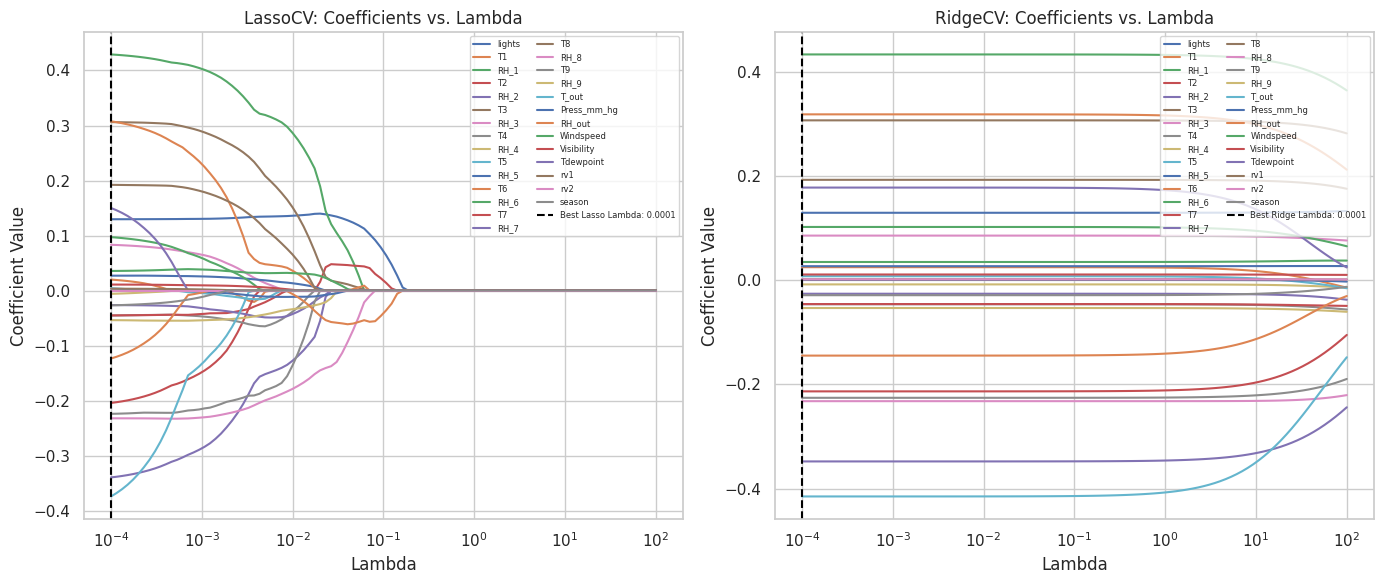

In [17]:

lasso_coeffs = np.array(lasso_coeffs)
ridge_coeffs = np.array(ridge_coeffs)

# Plotting Lasso Coefficients
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i, predictor in enumerate(predictors):
    plt.plot(alphas, lasso_coeffs[:, i], label=predictor)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('LassoCV: Coefficients vs. Lambda')
plt.axvline(lasso_opt_alpha, color='black', linestyle='--', label=f'Best Lasso Lambda: {lasso_opt_alpha:.4f}')
plt.legend(loc='upper right', fontsize=6, ncol=2)
plt.grid(True)

# Plotting Ridge Coefficients
plt.subplot(1, 2, 2)
for i, predictor in enumerate(predictors):
    plt.plot(alphas, ridge_coeffs[:, i], label=predictor)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('RidgeCV: Coefficients vs. Lambda')
plt.axvline(ridge_opt_alpha, color='black', linestyle='--', label=f'Best Ridge Lambda: {ridge_opt_alpha:.4f}')
plt.legend(loc='upper right', fontsize=6, ncol=2)
plt.grid(True)

plt.tight_layout()
plt.show()